# Compressed Sensing Approach to Systems and Control

Masaaki Nagahara, Compressed Sensing Approach to Systems and Control, Boston-Delft: Now Publishers, 2025.

# Chapter 3
# Sparse Optimization

Install CVXPY

In [ ]:
! pip install cvxpy

## 3.1 Least squares and regularization

## Example 3.1

In [ ]:
import numpy as np

# Data
t = np.arange(1, 16)
y = 2 * t

# Vandermonde matrix
#Phi = np.vander(t, increasing=False)
Phi = np.vander(t)

# Coefficients of interpolating polynomial
x = np.linalg.inv(Phi) @ y
print(x)

[ 2.85231728e-19 -1.49471669e-17  3.13375085e-16 -4.28216490e-15
  6.10900219e-14 -8.59645688e-13  8.46611670e-12 -4.87716534e-11
  1.73088210e-10 -3.61524144e-10  4.81122697e-10 -3.00133252e-10
  3.69254849e-10  2.00000000e+00  3.18323146e-11]


Interpolation with noisy data:

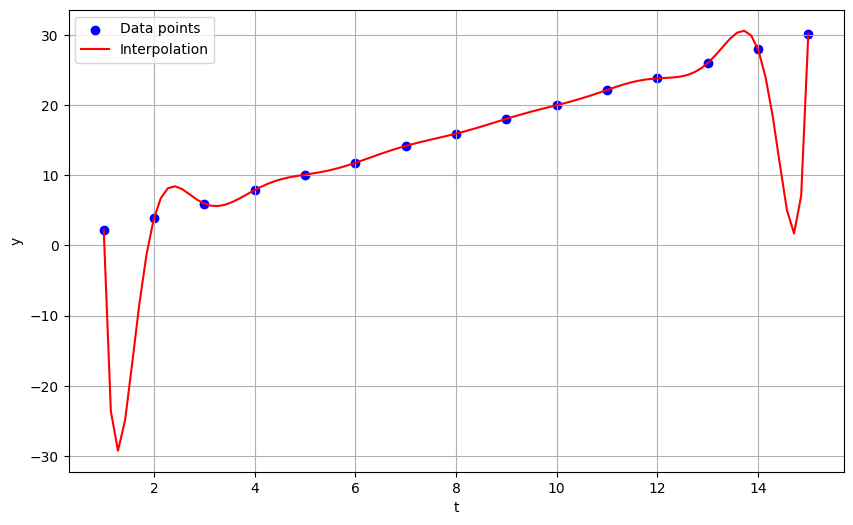

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files

# Data
np.random.seed(1)  # random seed
t = np.arange(1, 16)
y = 2 * t + np.random.randn(15) * 0.1

# Vandermonde matrix
Phi = np.vander(t)

# Coefficients of interpolating polynomial
xi = np.linalg.inv(Phi) @ y

# Plot
t_fit = np.linspace(1, 15, 100)
y_interp = np.polyval(xi, t_fit)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(t, y, color='blue', label='Data points')
plt.plot(t_fit, y_interp, color='red',label='Interpolation')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Save the plot as a high-resolution image
plt.savefig('lag-interp.pdf', dpi=300)  # Specify dpi for high resolution

plt.show()

## Example 3.2

In [ ]:
import numpy as np

# Data
np.random.seed(1)  # random seed
t = np.arange(1, 16)
y = 2 * t + np.random.randn(15) * 0.5

# Vandermonde matrix
Phi15 = np.vander(t, 15)
Phi = Phi15[:, 13:15]

# Least squares solution
Phi_transpose = Phi.T
x = np.linalg.inv(Phi_transpose @ Phi) @ Phi_transpose @ y
print(x)

[ 1.99907309 -0.03065618]


Plot the curves.

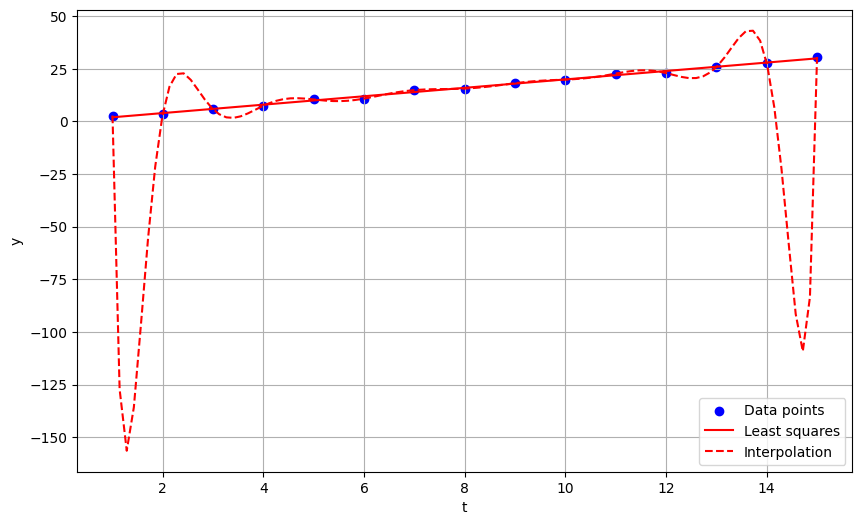

In [ ]:
# Plot
import matplotlib.pyplot as plt

from google.colab import files

# Coefficients of interpolating polynomial
xi = np.linalg.inv(Phi15) @ y

# Generate points for plotting the polynomial curve
t_fit = np.linspace(1, 15, 100)
y_LS = np.polyval(x,t_fit)
y_interp = np.polyval(xi, t_fit)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(t, y, color='blue', label='Data points')
plt.plot(t_fit, y_LS, color='red', label='Least squares')
plt.plot(t_fit, y_interp, 'r--',label='Interpolation')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Save the plot as a high-resolution image
plt.savefig('least_squares_solution.pdf', dpi=300)  # Specify dpi for high resolution

plt.show()

## Example 3.3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data
T = 10
t = np.arange(0, T+1)
np.random.seed(0)  # random seed
y = np.sin(np.sin(np.sin(np.sin(t)))) + np.random.randn(T+1) * 0.2  # Observations with noise

# Vandermonde matrix
Phi = np.vander(t)

# Interpolating polynomial
xi = np.linalg.inv(Phi) @ y
print("Interpolating polynomial")
for coeff in xi:
    print(f"{coeff:.4f}")

# 6-th order polynomial by least squares
order = 6
Phi6 = np.vander(t, order+1)

# Least squares solution
x6 = np.linalg.inv(Phi6.T @ Phi6) @ Phi6.T @ y
print("\n 6th order least squares")
for coeff in x6:
    print(f"{coeff:.4f}")

# Regularization parameter
lambda_ = 1  # Regularization parameter
x = np.linalg.inv(lambda_ * np.eye(T+1) + Phi.T @ Phi) @ Phi.T @ y
print("\n Ridge")
for coeff in x:
    print(f"{coeff:.4f}")

Interpolating polynomial
0.0000
-0.0011
0.0228
-0.2690
1.9368
-8.7587
24.7010
-41.5757
37.3672
-13.0687
0.3528

 6th order least squares
0.0005
-0.0157
0.1704
-0.7883
1.3586
-0.3993
0.3549

 Ridge
0.0000
0.0000
-0.0000
0.0006
-0.0087
0.0607
-0.1821
0.1092
0.2134
0.1810
0.2435


Plot curves

In [ ]:
# Generate points for plotting the polynomial fit
tt = np.arange(0, T, 0.01)
y_fit = np.polyval(x, tt)
y_fit6 = np.polyval(x6, tt)
y_fit_i = np.polyval(xi, tt)

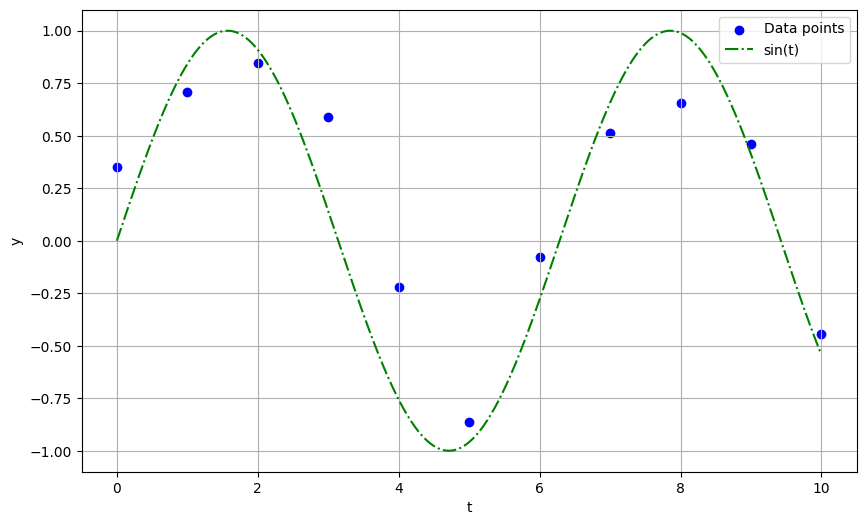

In [ ]:
# Plot original curve
plt.figure(figsize=(10, 6))
plt.scatter(t, y, color='blue', label='Data points') # data points
plt.plot(tt, np.sin(tt), 'g-.', label='sin(t)')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Save the plot as a high-resolution image
plt.savefig('reg_data.pdf', dpi=300)

# Show the plot
plt.show()

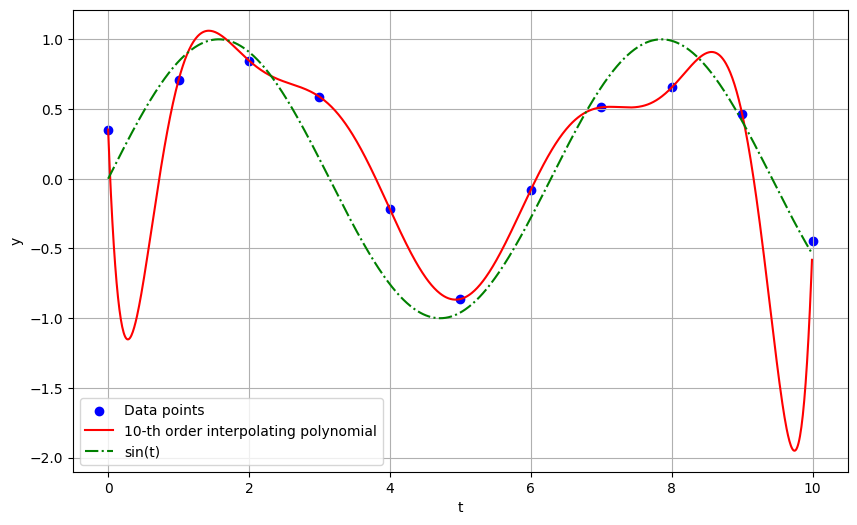

In [ ]:
# Plot 10th order interpolating polynomial
plt.figure(figsize=(10, 6))
plt.scatter(t, y, color='blue', label='Data points') # data points
plt.plot(tt,y_fit_i, 'r-', label='10-th order interpolating polynomial') # 10th order interpolating polynomial
plt.plot(tt, np.sin(tt), 'g-.', label='sin(t)')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Save the plot as a high-resolution image
plt.savefig('LS10.pdf', dpi=300)

# Show the plot
plt.show()

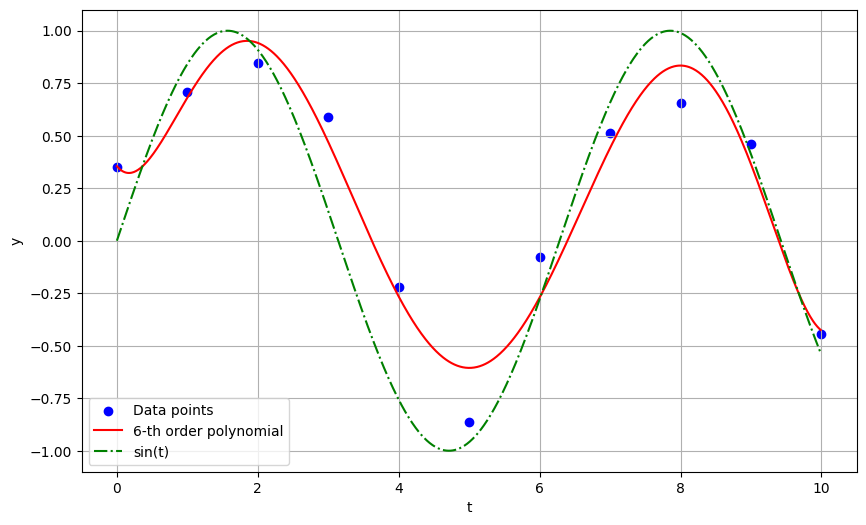

In [ ]:
# Plot 6th order polynomial
plt.figure(figsize=(10, 6))
plt.scatter(t, y, color='blue', label='Data points') # data points
plt.plot(tt, y_fit6, 'r-', label='6-th order polynomial') # 6th order polynomial by least squares
plt.plot(tt, np.sin(tt), 'g-.', label='sin(t)')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Save the plot as a high-resolution image
plt.savefig('LS6.pdf', dpi=300)

# Show the plot
plt.show()

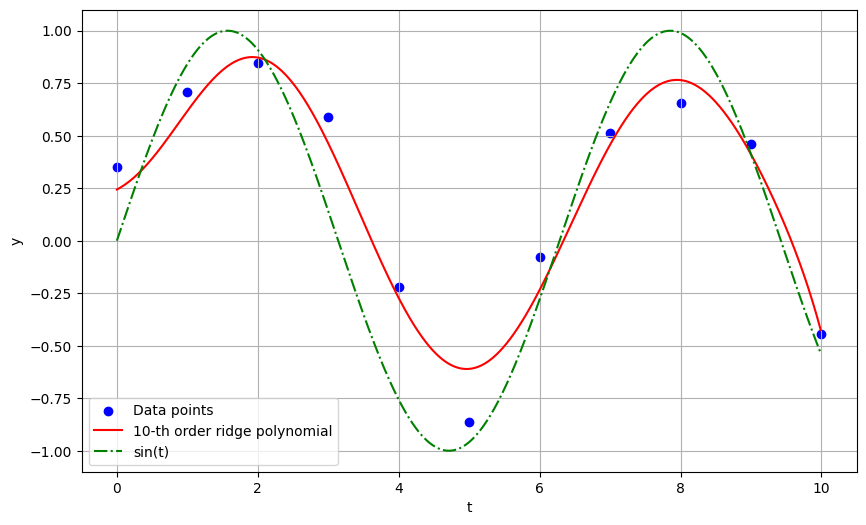

In [ ]:
# Plot ridge polynomial
plt.figure(figsize=(10, 6))
plt.scatter(t, y, color='blue', label='Data points') # data points
plt.plot(tt, y_fit, 'r-', label='10-th order ridge polynomial') # 10th order polynomial by ridge
plt.plot(tt, np.sin(tt), 'g-.', label='sin(t)')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Save the plot as a high-resolution image
plt.savefig('reg-LS.pdf', dpi=300)

# Show the plot
plt.show()

## 3.2 Sparse Polynomial and $\ell^1$ norm Optimization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

# Polynomial coefficients
x_orig = np.zeros(80)
x_orig[0] = -1
x_orig[78] = 1

# Data
t = np.arange(0, 1.1, 0.1)
y = np.polyval(x_orig, t)

# Vandermonde matrix
N = len(t)
M = N - 1 # order of polynomial
Phi_v = np.vander(t)

## Interpolation polynomial
x_i = np.linalg.inv(Phi_v) @ y
print("Interpolating polynomial")
for coeff in x_i:
    print(f"{coeff:.4f}")

## L1 optimization
# Vandermonde matrix
M_l = 80 # order of polynomial
Phi_l = np.vander(t, N=M_l+1)

# CVXPY for L1 optimization
x = cp.Variable(M_l+1)
objective = cp.Minimize(cp.norm(x, 1))
constraints = [Phi_l @ x == y]
problem = cp.Problem(objective, constraints)
problem.solve()

# Extract the coefficients
x_lasso = x.value
print("\n LASSO")
for coeff in x.value:
    print(f"{coeff:.4f}")


Interpolating polynomial
-2749.0451
12370.0347
-23914.2865
25974.8272
-17391.0016
7402.3654
-1988.9793
322.3016
-28.2137
1.9973
0.0000

 LASSO
-0.8850
-0.0088
-0.0078
-0.0090
-0.0107
-0.0125
-0.0139
-0.0144
-0.0137
-0.0115
-0.0077
-0.0036
-0.0010
-0.0002
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
-0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
1.0000
0.0000


Plot curves

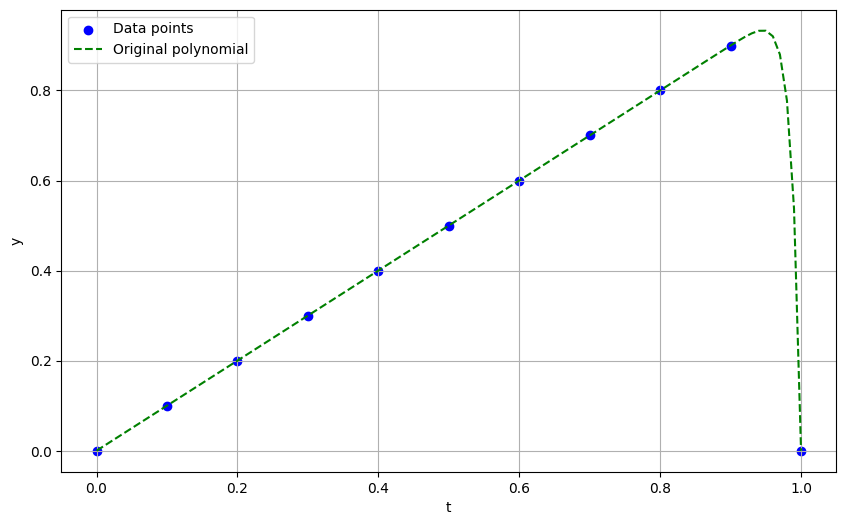

In [ ]:
# Plot original polynomial
tt = np.arange(0, 1.01, 0.01)
y_orig = np.polyval(x_orig, tt)

plt.figure(figsize=(10, 6))
plt.scatter(t, y, color='blue', label='Data points') # data points
plt.plot(tt, y_orig, 'g--', label='Original polynomial')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Save the plot as a high-resolution image
plt.savefig('sparse_polynomial.pdf', dpi=300)

# Show the plot
plt.show()


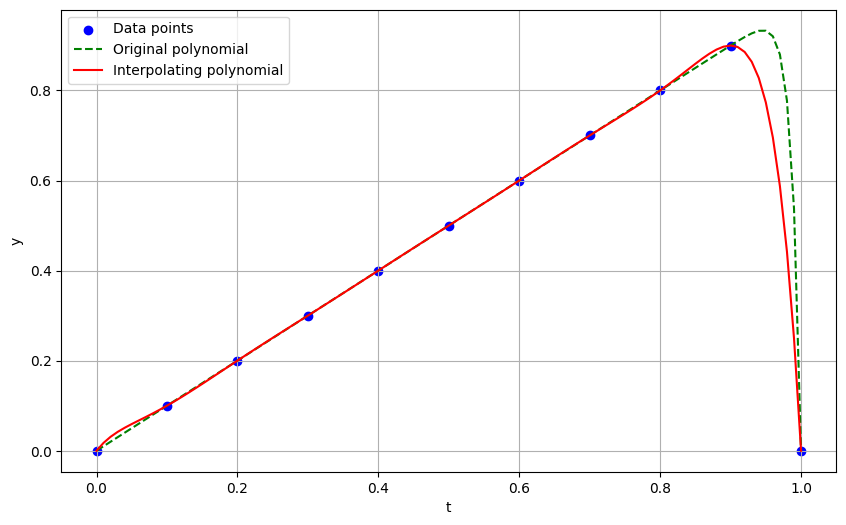

In [ ]:
# Plot interpolating polynomial
tt = np.arange(0, 1.01, 0.01)
y_orig = np.polyval(x_orig, tt)
y_i = np.polyval(x_i, tt)

plt.figure(figsize=(10, 6))
plt.scatter(t, y, color='blue', label='Data points') # data points
plt.plot(tt, y_orig, 'g--', label='Original polynomial')
plt.plot(tt, y_i, 'r-', label='Interpolating polynomial')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Save the plot as a high-resolution image
plt.savefig('sparse_polynomial_interp.pdf', dpi=300)

# Show the plot
plt.show()


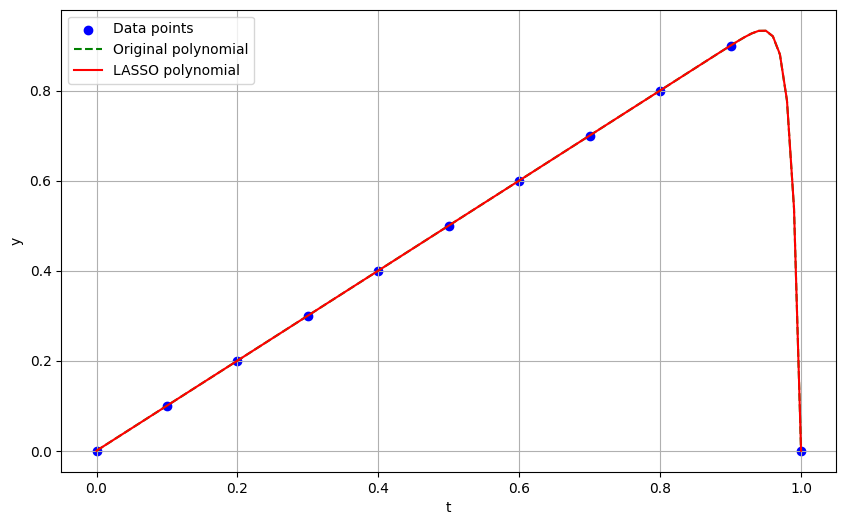

In [ ]:
# Plot sparse polynomial by LASSO
tt = np.arange(0, 1.01, 0.01)
y_orig = np.polyval(x_orig, tt)
y_lasso = np.polyval(x_lasso, tt)

plt.figure(figsize=(10, 6))
plt.scatter(t, y, color='blue', label='Data points') # data points
plt.plot(tt, y_orig, 'g--', label='Original polynomial')
plt.plot(tt, y_lasso, 'r-', label='LASSO polynomial')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Save the plot as a high-resolution image
plt.savefig('sparse_polynomial_LASSO.pdf', dpi=300)

# Show the plot
plt.show()


## 3.3.2 Group Testing
### Optimization problem:
$$
  \text{minimize} \|x\|_1 ~~ \text{subject to} ~ \Phi x = y
$$

status: optimal
optimal value 5.000000000946216


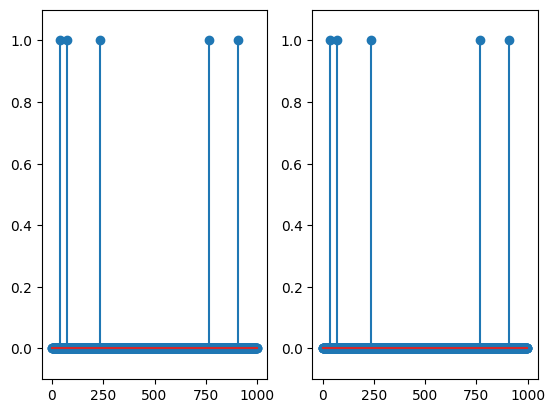

(array([ 37,  72, 235, 767, 908]),)
(array([ 37,  72, 235, 767, 908]),)


In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

## Parameter settings
# Vector size (number of individuals)
n = 1000
# Number of positives
s = 5
# Random seed
np.random.seed(1)
# Original vector (n-dimensional, k-sparse)
x_orig = np.zeros(n)
S = np.random.randint(n,size=s)
x_orig[S] = 1
# Number of tests
m = 100
# Testing matrix
Phi = np.random.randint(2,size=(m, n))
# Result vector
y = Phi @ x_orig

## Optimization by CVXPY
# Optimization variable
x = cp.Variable(n)
# Cost function (L1 norm)
cost = cp.norm1(x)
# Constraints (linear equations)
constraints = [Phi @ x == y]
# Optimization problem
prob = cp.Problem(cp.Minimize(cost), constraints)
# Solve by CVXPY
prob.solve()
# Print the result
print("status:", prob.status)
print("optimal value", prob.value)

## Results
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.stem(x_orig)
plt.ylim(-0.1,1.1)
ax2 = fig.add_subplot(1, 2, 2)
ax2.stem(x.value)
plt.ylim(-0.1,1.1)


# Save the plot as a high-resolution image
plt.savefig('group_testing_cvxpy.pdf', dpi=300)  # Specify dpi for high resolution

plt.show()

print(np.nonzero(x_orig))
x_est=np.round(x.value)
print(x_est.nonzero())

## 4.4.3 Noisy Group Testing by FISTA

We solve the following optimization problem in the group testing example by FISTA
$$\text{minimize} ~ \|\Phi x-y\|_2^2 + \lambda \|x\|_1$$

Note: for this example, we take $n=1000$, $s=5$, and $m=100$, with noisy observation $y = \Phi x_{\rm{orig}} + n$ where $n$ is Gaussian noise with mean 0 and variance 0.01.

(array([ 37,  72, 235, 767, 908]),)
(array([ 37,  72, 235, 767, 908]),)


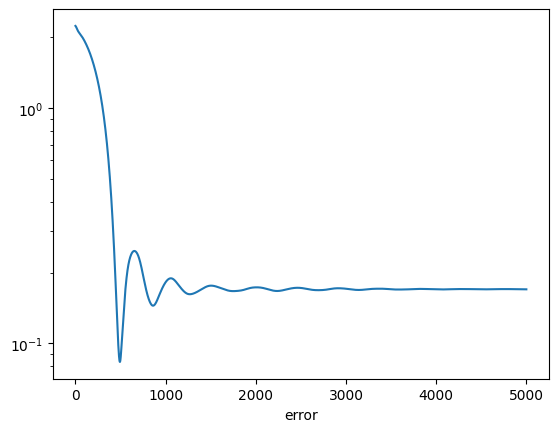

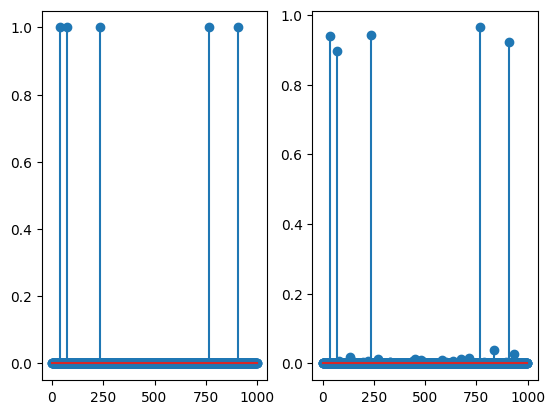

In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

## Parameter settings
# Vector size (number of individuals)
n = 1000
# Number of positives
s = 5
# Random seed
np.random.seed(1)
# Original vector (n-dimensional, k-sparse)
x_orig = np.zeros(n)
S = np.random.randint(n,size=s)
x_orig[S] = 1
# Number of tests
m = 100
# Testing matrix
Phi = np.random.randint(2,size=(m, n))
# Result vector
y = Phi @ x_orig + 0.1 * np.random.randn(m)

## Optimization by FISTA
# Soft-thresholding function
def St(lmbd, v):
    n = v.shape[0]
    Sv = np.zeros(n)
    i = np.abs(v) > lmbd
    Sv[i] = v[i] - np.sign(v[i]) * lmbd
    return Sv

# parameter settings
lmbd = 1
Phi_norm = np.linalg.norm(Phi,2)
gamma = 1/Phi_norm**2 # step size
max_itr = 5000 # number of iterations
x = np.zeros(n) # initial guess for x
z = x # initial guess for z
t = 0 # initial guess for t

error = np.zeros(max_itr) # residual

# FISTA iteration
for k in range(max_itr):
  error[k] = np.linalg.norm(x_orig - x)
  res = Phi @ z - y
  x2 = St(gamma*lmbd, z - gamma*Phi.T @ res)
  t2 = (1 + np.sqrt(1+4*t**2))/2
  z = x2 + (t-1)/t2 * (x2 - x)
  x = x2
  t = t2

## Results
fig = plt.figure()
plt.semilogy(error)
plt.xlabel("k")
plt.xlabel("error")

plt.savefig("group_testing_FISTA_error.pdf", dpi=300)

## Reconstructed vector
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.stem(x_orig)
ax2 = fig.add_subplot(1, 2, 2)
ax2.stem(x)
plt.savefig("group_testing_FISTA_results.pdf", dpi=300)

print(np.nonzero(x_orig))
x_est = np.round(x)
print(x_est.nonzero())

## 4.5.2 Total variation denoising

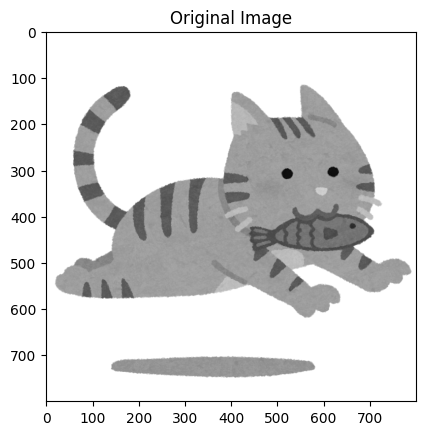

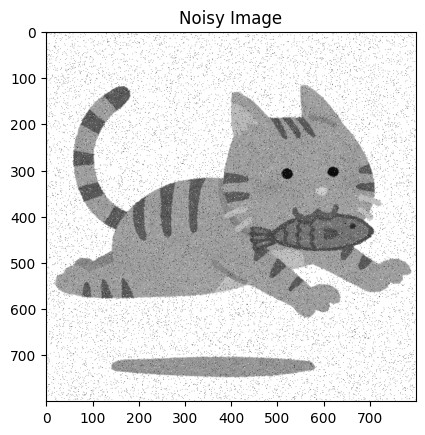

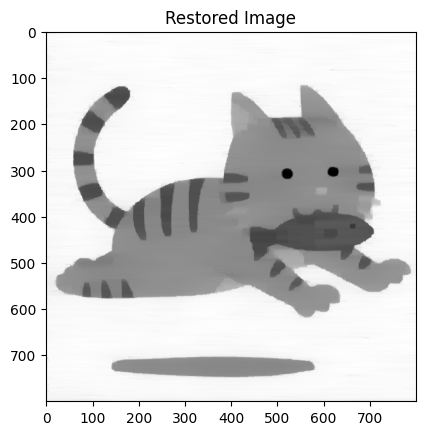

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.sparse import eye, diags, kron
from scipy.sparse.linalg import spsolve

def soft_thresholding(lam, X):
    return np.sign(X) * np.maximum(np.abs(X) - lam, 0)

# Read image and convert to grayscale
img = Image.open('cat.jpg').convert('L')
X_orig = np.array(img)
n, m = X_orig.shape

# Add salt and pepper noise
np.random.seed(1)
Y = X_orig.copy()
num_salt = np.ceil(0.05 * Y.size * 0.5)
coords = [np.random.randint(0, i - 1, int(num_salt)) for i in Y.shape]
Y[coords[0], coords[1]] = 255
Y[coords[1], coords[0]] = 0

# Display original and noisy images
plt.figure()
plt.imshow(X_orig, cmap='gray')
plt.title('Original Image')
#plt.savefig("cat_orig.pdf", dpi=300)
#plt.show()

plt.figure()
plt.imshow(Y, cmap='gray')
plt.title('Noisy Image')
#plt.savefig("cat_noise.pdf", dpi=300)
#plt.show

# Denoising parameters
lambda_val = 100
gamma = 1
N = 500
Phi = eye(n)
Psi = -diags([np.ones(n)], [0]) + diags([np.ones(n - 1)], [1])

# Matrix M
M = (Phi.T * Phi + (1 / gamma) * (Psi.T * Psi)).tocsc()

# Optimization
X_res = np.zeros_like(Y, dtype=float)
Z = np.zeros_like(Y, dtype=float)
V = np.zeros_like(Y, dtype=float)
W = Phi.T @ Y.astype(float)
for k in range(N):
    X_res = spsolve(M, W + gamma * Psi.T @ (Z - V))
    P = Psi @ X_res + V
    Z = soft_thresholding(gamma * lambda_val, P)
    V = P - Z

# Horizontal processing
W = np.rot90(X_res)
for k in range(N):
    X_res = spsolve(M, W + gamma * Psi.T @ (Z - V))
    P = Psi @ X_res + V
    Z = soft_thresholding(gamma * lambda_val, P)
    V = P - Z
X_res = np.rot90(X_res, -1)

# Show the restored image
plt.figure()
plt.imshow(np.clip(X_res.round(), 0, 255).astype(np.uint8), cmap='gray')
plt.title('Restored Image')
plt.savefig("cat_restored_100.pdf", dpi=300)
plt.show()


# 5. Greedy Algorithms

Import numpy package

In [ ]:
import numpy as np

## Matching Pursuit (MP) algorithm

In [ ]:
# Matching Pursuit (MP) algorithm
def MP(y, Phi, EPS=1e-5, MAX_ITER=10000):
    m, n = Phi.shape
    x = np.zeros(n)
    r = y
    k = 0
    Phi_norm = np.diag(Phi.T @ Phi)
    while np.linalg.norm(r) > EPS and k < MAX_ITER:
        p = Phi.T @ r
        v = p / np.sqrt(Phi_norm)
        ik = np.argmax(np.abs(v))
        v2 = p / Phi_norm
        z = v2[ik]
        x[ik] += z
        r -= z * Phi[:, ik]
        k += 1
    nitr = k
    return x, nitr

## Orthogonal Matching Pursuit (OMP) algorithm

In [ ]:
# Orthogonal Matching Pursuit (OMP) algorithm
def OMP(y, Phi, EPS=1e-5, MAX_ITER=10000):
    m, n = Phi.shape
    x = np.zeros(n)
    r = y
    k = 0
    S = []
    Phi_norm = np.diag(Phi.T @ Phi)
    while (np.linalg.norm(r) > EPS) and (k < MAX_ITER):
        p = Phi.T @ r
        v = p / np.sqrt(Phi_norm)
        ik = np.argmax(np.abs(v))
        if ik not in S:
            S.append(ik)
        Phi_S = Phi[:, S]
        x_S = np.linalg.lstsq(Phi_S, y, rcond=None)[0]
        x = np.zeros(n)
        x[S] = x_S
        r = y - Phi @ x
        k += 1

    nitr = k
    return x, nitr

## Hard thresholding operator


In [ ]:
# Hard thresholding operator
def hard_thresholding(lambda_val, v):
    hv = np.where(np.abs(v) <= lambda_val, 0, v)
    return hv

## Support function

In [ ]:
# Support function
def supp(x):
    return np.nonzero(np.abs(x) > 0)[0]

## Iterative Hard Thresholding (IHT) algorithm

In [ ]:
# Iterative Hard Thresholding (IHT) algorithm
def IHT(y, Phi, lambda_val=1, gamma=1, EPS=1e-5, MAX_ITER=10000):
    m, n = Phi.shape
    x = np.zeros(n)
    r = y
    k = 0
    while np.linalg.norm(r) > EPS and k < MAX_ITER:
        p = x + gamma * (Phi.T @ r)
        x = hard_thresholding(np.sqrt(2 * lambda_val * gamma), p)
        S = supp(x)
        r = y - Phi[:, S] @ x[S]
        k += 1
    nitr = k
    return x, nitr

## s-sparse operator

In [ ]:
# s-sparse operator
def s_sparse_operator(A, s):
    x = A.flatten()
    y = np.zeros_like(x)
    indx = np.argsort(-np.abs(x))[:s]
    y[indx] = x[indx]
    return y.reshape(A.shape)

## Iterative s-sparse algorithm

In [ ]:
# Iterative s-sparse algorithm
def iterative_s_sparse(y, Phi, s, gamma=1, EPS=1e-5, MAX_ITER=10000):
    m, n = Phi.shape
    x = np.zeros(n)
    r = y
    k = 0
    while np.linalg.norm(r) > EPS and k < MAX_ITER:
        p = x + gamma * (Phi.T @ r)
        x = s_sparse_operator(p, s)
        S = supp(x)
        r = y - Phi[:, S] @ x[S]
        k += 1
    nitr = k
    return x, nitr

## CoSaMP algorithm

In [ ]:
# CoSaMP algorithm
def CoSaMP(y, Phi, s, EPS=1e-5, MAX_ITER=10000):
    m, n = Phi.shape
    x = np.zeros(n)
    r = y
    k = 0
    S = []
    Lambda = []
    Phi_norm = np.diag(Phi.T @ Phi)
    while np.linalg.norm(r) > EPS and k < MAX_ITER:
        p = s_sparse_operator((Phi.T @ r) / np.sqrt(Phi_norm), 2 * s)
        Ik = supp(p)
        S = np.union1d(Lambda, Ik)
        Phi_S = Phi[:, S.astype(int)]
        z = np.zeros(n)
        z[S.astype(int)] = np.linalg.pinv(Phi_S) @ y
        x = s_sparse_operator(z, s)
        Lambda = supp(x)
        r = y - Phi_S @ z[S.astype(int)]
        k += 1
    nitr = k
    return x, nitr


## 5.4 Numerical Example

import packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

### L1 optimization via CVXPY

                                     CVXPY                                     
                                     v1.3.4                                    
(CVXPY) Jul 13 12:43:14 AM: Your problem has 80 variables, 1 constraints, and 0 parameters.
(CVXPY) Jul 13 12:43:14 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 13 12:43:14 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 13 12:43:14 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jul 13 12:43:14 AM: Compiling problem (target solver=ECOS).
(CVXPY) Jul 13 12:43:14 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing ->

(-1.1, 1.1)

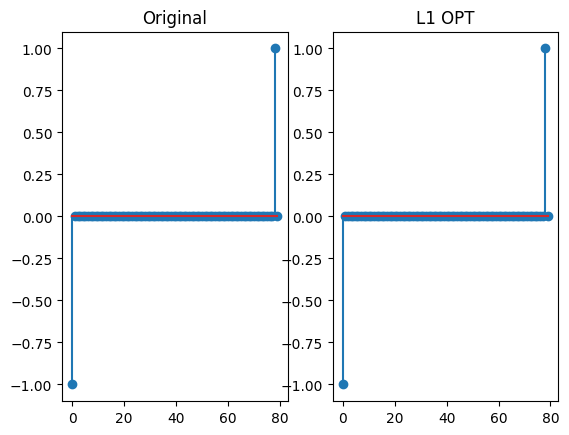

In [ ]:
# Polynomial coefficients
x_orig = np.zeros(80)
x_orig[0] = -1
x_orig[78] = 1

# Data
t = np.arange(0, 1.1, 0.1)
y = np.polyval(x_orig, t)

# Data size
N = len(t)
M = N - 1

# Order of polynomial
M_l = len(x_orig) - 1

# Vandermonde matrix
Phi = np.vander(t, N=M_l+1)

# L1 by CVX
x_l1 = cp.Variable(M_l + 1)
objective = cp.Minimize(cp.norm(x_l1, 1))
constraints = [Phi @ x_l1 == y]
prob = cp.Problem(objective, constraints)
prob.solve(verbose=True)
x_l1 = x_l1.value
nitr_l1 = prob.solver_stats.num_iters

# Result
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.stem(x_orig)
ax1.set_title("Original")
plt.ylim(-1.1,1.1)
ax2 = fig.add_subplot(1, 2, 2)
ax2.stem(x_l1)
ax2.set_title("L1 OPT")
plt.ylim(-1.1,1.1)


### Matching Pursuit

(-1.1, 1.1)

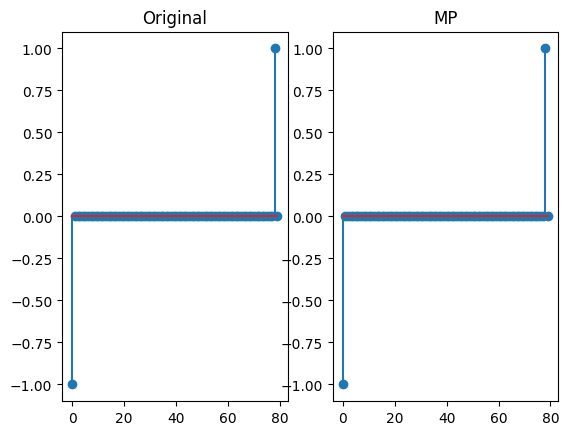

In [ ]:
# Polynomial coefficients
x_orig = np.zeros(80)
x_orig[0] = -1
x_orig[78] = 1

# Data
t = np.arange(0, 1.1, 0.1)
y = np.polyval(x_orig, t)

# Data size
N = len(t)
M = N - 1

# Order of polynomial
M_l = len(x_orig) - 1

# Vandermonde matrix
Phi = np.vander(t, N=M_l+1)

# Parameters for iteration
EPS = 1e-5  # if the residue < EPS then the iteration will stop
MAX_ITER = 100000  # maximum number of iterations

# Matching Pursuit
x_mp, nitr_mp = MP(y, Phi, EPS, MAX_ITER)

# Result
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.stem(x_orig)
ax1.set_title("Original")
plt.ylim(-1.1,1.1)
ax2 = fig.add_subplot(1, 2, 2)
ax2.stem(x_mp)
ax2.set_title("MP")
plt.ylim(-1.1,1.1)


### Orthogonal Matching Pursuit

(-1.1, 1.1)

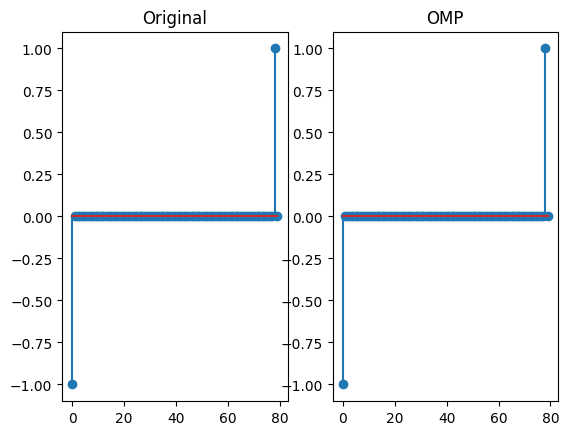

In [ ]:
# Polynomial coefficients
x_orig = np.zeros(80)
x_orig[0] = -1
x_orig[78] = 1

# Data
t = np.arange(0, 1.1, 0.1)
y = np.polyval(x_orig, t)

# Data size
N = len(t)
M = N - 1

# Order of polynomial
M_l = len(x_orig) - 1

# Vandermonde matrix
Phi = np.vander(t, N=M_l+1)

# Parameters for iteration
EPS = 1e-5  # if the residue < EPS then the iteration will stop
MAX_ITER = 100000  # maximum number of iterations

# OMP
x_omp, nitr_omp = OMP(y, Phi,EPS,10)
# Result
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.stem(x_orig)
ax1.set_title("Original")
plt.ylim(-1.1,1.1)
ax2 = fig.add_subplot(1, 2, 2)
ax2.stem(x_omp)
ax2.set_title("OMP")
plt.ylim(-1.1,1.1)


### Iterative Hard Thresholding (IHT)

(-1.1, 1.1)

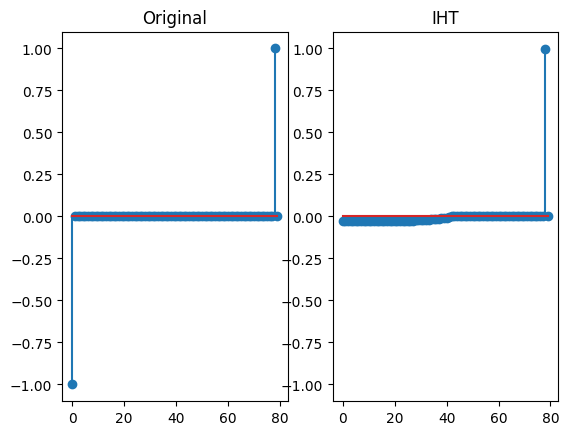

In [ ]:
# Polynomial coefficients
x_orig = np.zeros(80)
x_orig[0] = -1
x_orig[78] = 1

# Data
t = np.arange(0, 1.1, 0.1)
y = np.polyval(x_orig, t)

# Data size
N = len(t)
M = N - 1

# Order of polynomial
M_l = len(x_orig) - 1

# Vandermonde matrix
Phi = np.vander(t, N=M_l+1)

# Parameters for iteration
EPS = 1e-5  # if the residue < EPS then the iteration will stop
MAX_ITER = 100000  # maximum number of iterations

# IHT
lambda_val = 0.001
gamma = 0.01
x_iht, nitr_iht = IHT(y, Phi, lambda_val, gamma, EPS, MAX_ITER)
# Result
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.stem(x_orig)
ax1.set_title("Original")
plt.ylim(-1.1,1.1)
ax2 = fig.add_subplot(1, 2, 2)
ax2.stem(x_iht)
ax2.set_title("IHT")
plt.ylim(-1.1,1.1)

### Iterative s-sparse (ISS) algorithm

(-1.1, 1.1)

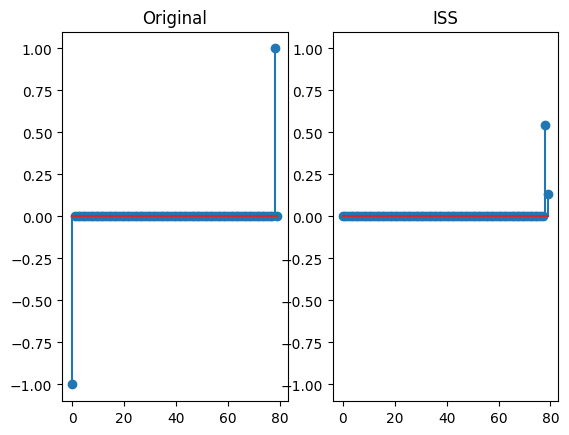

In [ ]:
# Polynomial coefficients
x_orig = np.zeros(80)
x_orig[0] = -1
x_orig[78] = 1

# Data
t = np.arange(0, 1.1, 0.1)
y = np.polyval(x_orig, t)

# Data size
N = len(t)
M = N - 1

# Order of polynomial
M_l = len(x_orig) - 1

# Vandermonde matrix
Phi = np.vander(t, N=M_l+1)

# Parameters for iteration
EPS = 1e-5  # if the residue < EPS then the iteration will stop
MAX_ITER = 100000  # maximum number of iterations
s = np.count_nonzero(x_orig)

# iterative s-sparse
x_iss, nitr_iss = iterative_s_sparse(y, Phi, s, gamma, EPS, MAX_ITER)
# Result
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.stem(x_orig)
ax1.set_title("Original")
plt.ylim(-1.1,1.1)
ax2 = fig.add_subplot(1, 2, 2)
ax2.stem(x_iss)
ax2.set_title("ISS")
plt.ylim(-1.1,1.1)

### CoSAMP

(-1.1, 1.1)

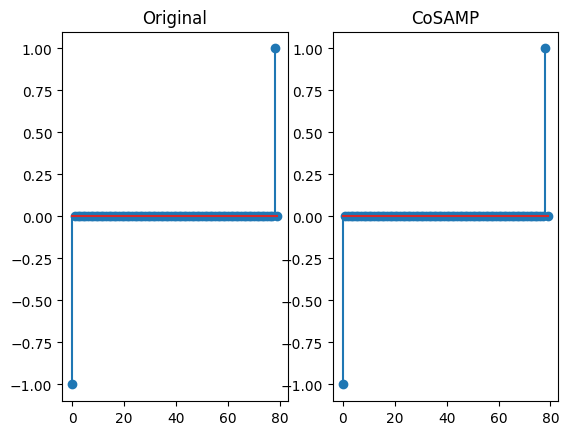

In [ ]:
# Polynomial coefficients
x_orig = np.zeros(80)
x_orig[0] = -1
x_orig[78] = 1

# Data
t = np.arange(0, 1.1, 0.1)
y = np.polyval(x_orig, t)

# Data size
N = len(t)
M = N - 1

# Order of polynomial
M_l = len(x_orig) - 1

# Vandermonde matrix
Phi = np.vander(t, N=M_l+1)

# Parameters for iteration
EPS = 1e-5  # if the residue < EPS then the iteration will stop
MAX_ITER = 100000  # maximum number of iterations
s = np.count_nonzero(x_orig)

# CoSaMP
s = len(supp(x_orig))
x_cosamp, nitr_cosamp = CoSaMP(y, Phi, s, EPS, MAX_ITER)
# Result
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.stem(x_orig)
ax1.set_title("Original")
plt.ylim(-1.1,1.1)
ax2 = fig.add_subplot(1, 2, 2)
ax2.stem(x_cosamp)
ax2.set_title("CoSAMP")
plt.ylim(-1.1,1.1)

### Analysis

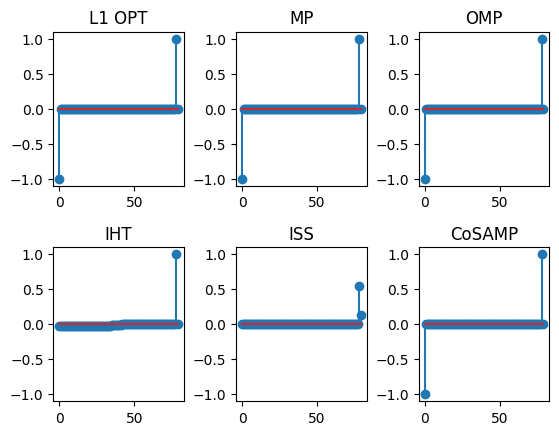

In [ ]:
# Plotting all results

fig = plt.figure()
ax = fig.subplots(2,3)

# L1 OPT
ax[0][0].stem(x_l1)
ax[0][0].set_title("L1 OPT")
ax[0][0].set_ylim(-1.1,1.1)
# MP
ax[0][1].stem(x_mp)
ax[0][1].set_title("MP")
ax[0][1].set_ylim(-1.1,1.1)
# OMP
ax[0][2].stem(x_omp)
ax[0][2].set_title("OMP")
ax[0][2].set_ylim(-1.1,1.1)
# IHT
ax[1][0].stem(x_iht)
ax[1][0].set_title("IHT")
ax[1][0].set_ylim(-1.1,1.1)
# ISS
ax[1][1].stem(x_iss)
ax[1][1].set_title("ISS")
ax[1][1].set_ylim(-1.1,1.1)
# CoSAMP
ax[1][2].stem(x_cosamp)
ax[1][2].set_title("CoSAMP")
ax[1][2].set_ylim(-1.1,1.1)


plt.subplots_adjust(wspace=0.4, hspace=0.4)


# Save the plot as a high-resolution image
plt.savefig('coefficients_greedy.pdf', dpi=300)

In [ ]:

# Residue calculation
r_l1 = y - Phi @ x_l1
e_l1 = np.linalg.norm(r_l1, 2)

r_mp = y - Phi @ x_mp
e_mp = np.linalg.norm(r_mp, 2)

r_omp = y - Phi @ x_omp
e_omp = np.linalg.norm(r_omp, 2)

r_iht = y - Phi @ x_iht
e_iht = np.linalg.norm(r_iht, 2)

r_iss = y - Phi @ x_iss
e_iss = np.linalg.norm(r_iss, 2)

r_cosamp = y - Phi @ x_cosamp
e_cosamp = np.linalg.norm(r_cosamp, 2)

error = np.array([
    e_l1,
    e_mp,
    e_omp,
    e_iht,
    e_iss,
    e_cosamp
])

n_itr = np.array([
    nitr_l1,
    nitr_mp,
    nitr_omp,
    nitr_iht,
    nitr_iss,
    nitr_cosamp
])

np.set_printoptions(precision=1)
print("Errors:", error)
print("Iterations:", n_itr)

Errors: [2.8e-12 9.1e-06 2.5e-16 1.7e-03 8.3e-01 4.1e-16]
Iterations: [     9     18      2 100000 100000      3]


# 6. Distributed optimization

## 6.1 Network Model and Algebraic Graph Theory

Graph example

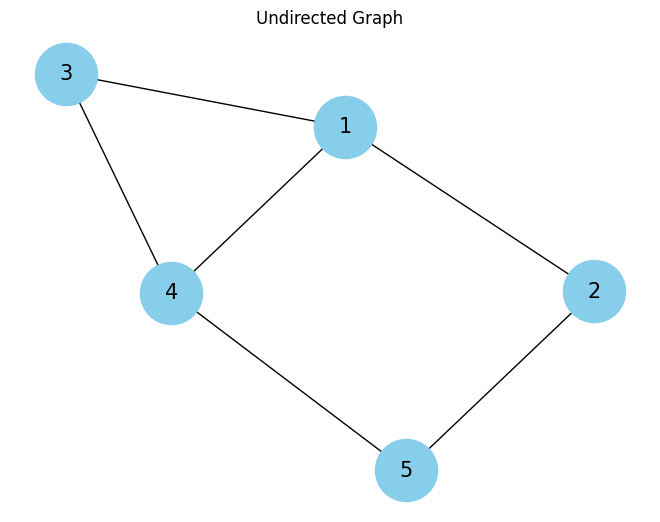

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph object
G = nx.Graph()

# Add vertices (nodes)
V = [1,2,3,4,5]
G.add_nodes_from(V)

# Add edges
E = [(1,2),(1,3),(1,4),(3,4),(2,5),(4,5)]
G.add_edges_from(E)

# Draw the graph
pos = nx.spring_layout(G)  # Position nodes using the spring layout algorithm
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', edge_color='black', linewidths=1, font_size=15)

# Show the graph
plt.title('Undirected Graph')
#plt.show()


# Save the plot as a high-resolution image
plt.savefig('simple_graph.pdf', dpi=300)


## 6.2 Consensus Algorithm

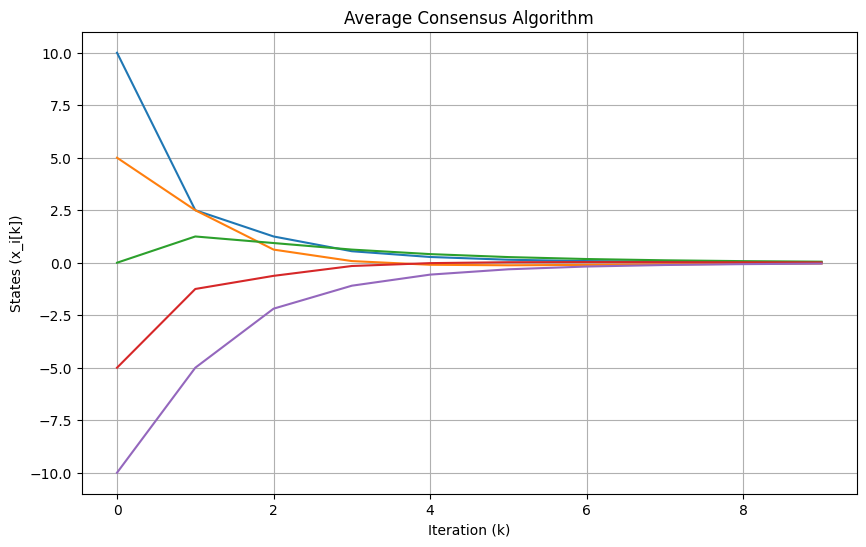

<Figure size 640x480 with 0 Axes>

In [ ]:
# Average consensus control

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Create a graph object
G = nx.Graph()

# Add vertices (nodes)
V = [1,2,3,4,5]
G.add_nodes_from(V)

# Add edges
E = [(1,2),(1,3),(1,4),(3,4),(2,5),(4,5)]
G.add_edges_from(E)

# Initialize the states of the nodes
x = np.array([10.0, 5.0, 0.0, -5.0, -10.0])

# Define the epsilon value
epsilon = 1 / 4

# Run the average consensus algorithm for a certain number of iterations
N_itr = 10
N_agents = len(V)
x_history = np.zeros([N_itr,N_agents]) # Store initial state
for k in range(N_itr):
  x_history[k,:] = x
  u = np.zeros_like(x)
  for i in range(len(V)):
    for j in range(len(V)):
      if (V[i], V[j]) in E or (V[j], V[i]) in E:
        u[i] += x[j] - x[i]
  u *= epsilon
  x += u
#  x_history.append(x.copy()) # Store state after each iteration

# Plot the time series for x_i[k]
plt.figure(figsize=(10, 6))
plt.plot(x_history)
plt.xlabel('Iteration (k)')
plt.ylabel('States (x_i[k])')
plt.title('Average Consensus Algorithm')
plt.grid(True)
plt.show()

#plt.savefig('consensus.pdf', dpi=300)

## 6.3.1 Distributed Gradient Descent

2.9999203158033376


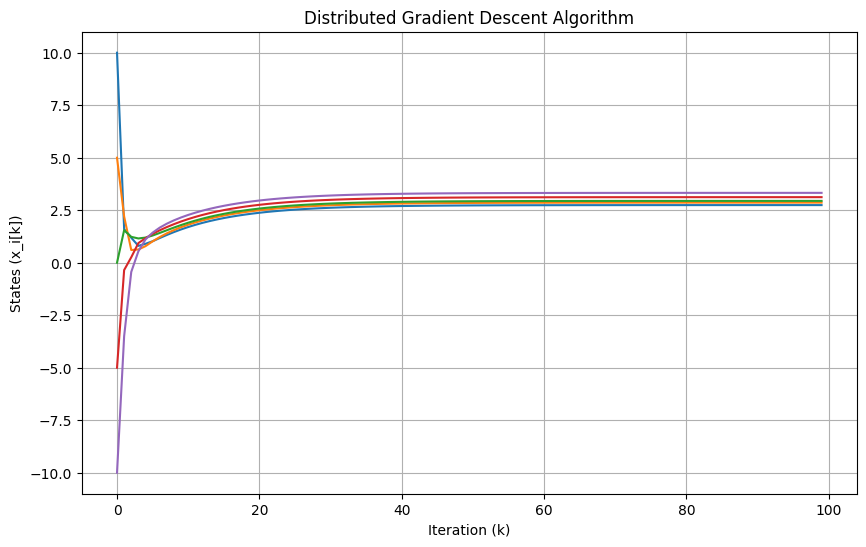

In [ ]:
# Distributed Gradient Descent

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Create a graph object
G = nx.Graph()

# Add vertices (nodes)
V = [1,2,3,4,5]
G.add_nodes_from(V)

# Add edges
E = [(1,2),(1,3),(1,4),(3,4),(2,5),(4,5)]
G.add_edges_from(E)

# Initialize the states of the nodes
x = np.array([10.0, 5.0, 0.0, -5.0, -10.0])

# Define the epsilon value
epsilon = 1 / 4

# Step size of DGD
alpha = 0.1

# Run the average consensus algorithm for a certain number of iterations
N_itr = 100
N_agents = len(V)
x_history = np.zeros([N_itr,N_agents]) # Store initial state
v = np.array([1,2,3,4,5])
for k in range(N_itr):
  x_history[k,:] = x
  u = np.zeros_like(x)
  for i in range(len(V)):
    for j in range(len(V)):
      if (V[i], V[j]) in E or (V[j], V[i]) in E:
        u[i] += x[j] - x[i]
  u *= epsilon
  x += u - alpha * (x - v)

# Estimation
x_est = np.sum(x) / N_agents
error = x_est - 3
print(x_est)

# Plot the time series for x_i[k]
plt.figure(figsize=(10, 6))
plt.plot(x_history)
plt.xlabel('Iteration (k)')
plt.ylabel('States (x_i[k])')
plt.title('Distributed Gradient Descent Algorithm')
plt.grid(True)
#plt.show()

plt.savefig('DGD.pdf', dpi=300)

## 6.3.3 Distributed least squares
We here consider the following optimization problem (least squares):
$$
\text{minimize}~ \|Ax-b\|_2^2
$$


In [ ]:
# Distributed least squares by the ADMM-based algorithm

import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

## Parameter settings
# random seed
np.random.seed(1)
# matrix A
n = 30
m = n
A = np.random.randn(m, n)
# original vector (n-dimensional, k-sparse)
k = 2
x_orig = np.zeros(n)
S = np.random.randint(n,size=k)
x_orig[S] = 1

# vector b
b = A @ x_orig + 0.01 * np.random.randn(m)

## Distributed ADMM
# Parameters
gamma = 1
N_agents = m
M = np.zeros([n,n,N_agents])
for i in range(N_agents):
  fi = A[i,:].reshape(1,-1)
  M[:,:,i] = LA.inv(fi.T @ fi + np.eye(n) / gamma)
# Iterations
max_itr = 10000 # number of iterations
x = np.zeros([n, N_agents])
u = np.zeros([n, N_agents])
x_bar = np.sum(x,axis=1) / N_agents
x_history = np.zeros([max_itr,N_agents])
for k in range(max_itr):
  x_history[k,:] = x_bar
  for i in range(N_agents):
    qi = b[i] * A[i,:]
    x_next = M[:,:,i] @ (qi + (x_bar - u[:,i]) / gamma)
    x[:,i] = x_next
  x_bar = np.sum(x,axis=1) / N_agents
  for i in range(N_agents):
    u_next = u[:,i] + x[:,i] - x_bar
    u[:,i] = u_next

# Estimation
x_est = np.sum(x,axis=1) / N_agents


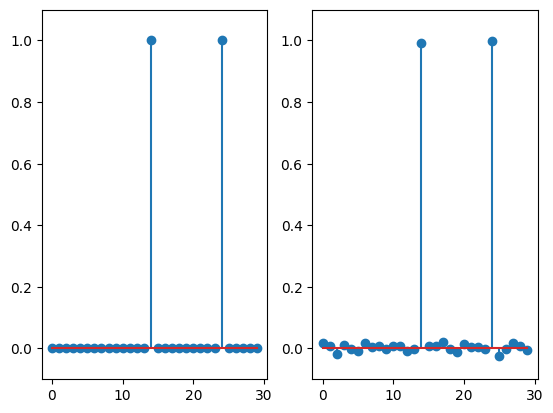

In [ ]:

## Reconstructed vector
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.stem(x_orig)
ax1.set_ylim(-0.1,1.1)
ax2 = fig.add_subplot(1, 2, 2)
ax2.stem(x_est)
ax2.set_ylim(-0.1,1.1)
#plt.show()

plt.savefig('distributed_LS_results.pdf', dpi=300)

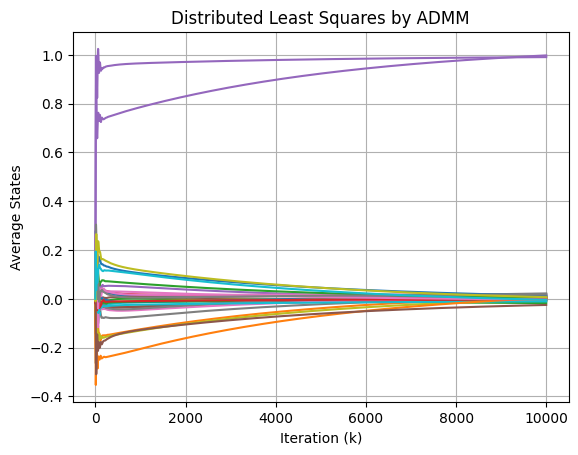

In [ ]:
## State trajectory
fig = plt.figure()
plt.plot(x_history)
plt.xlabel('Iteration (k)')
plt.ylabel('Average States')
plt.title('Distributed Least Squares by ADMM')
plt.grid(True)
#plt.show()

plt.savefig('distributed_LS_convergence.pdf', dpi=300)


## 6.3.4 Distributed sparse regularization
We here consider the following regularized optimization problem:
$$
\text{minimize}~ \|Ax-b\|_2^2 + \lambda \|x\|_1
$$

In [ ]:
# Distributed sparse regularization
import cvxpy as cp
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import networkx as nx

## Parameter settings
# random seed
np.random.seed(1)
# matrix A
n = 30
m = n
A = np.random.randn(m, n)
# original vector (n-dimensional, k-sparse)
k = 2
x_orig = np.zeros(n)
S = np.random.randint(n,size=k)
x_orig[S] = 1

# vector b
b = A @ x_orig + 0.01 * np.random.randn(m)

# Optimization parameter settings
lmbd = 1

# Optimization by distributed ADMM
# Soft-thresholding function
def St(lmbd, v):
    n = v.shape[0]
    Sv = np.zeros(n)
    i = np.abs(v) > lmbd
    Sv[i] = v[i] - np.sign(v[i]) * lmbd
    return Sv

# Parameters
gamma = 1
N_agents = m

M = np.zeros([n,n,N_agents])
for i in range(N_agents):
  fi = A[i,:].reshape(1,-1)
  M[:,:,i] = LA.inv(fi.T @ fi + rho * np.eye(n))

Ap = np.linalg.pinv(A) # Moore-Penrose pseudo inverse of A

# Iterations
max_itr = 1000 # number of iterations
x = np.zeros([n, N_agents])
u = np.zeros([n, N_agents])
z = np.zeros(n)
x_bar = np.sum(x,axis=1) / N_agents
x_history = np.zeros([max_itr,N_agents])
for k in range(max_itr):
  x_history[k,:] = x_bar
  for i in range(N_agents):
    qi = b[i] * A[i,:]
    x_next = M[:,:,i] @ (qi + (z - u[:,i]) / gamma)
    x[:,i] = x_next
  x_bar = np.sum(x,axis=1) / N_agents
  u_bar = np.sum(u,axis=1) / N_agents
  z = St(gamma * lmbd/ N_agents, x_bar + u_bar)
  for i in range(N_agents):
    u_next = u[:,i] + x[:,i] - z
    u[:,i] = u_next

# Estimation
x_est = np.sum(x,axis=1) / N_agents

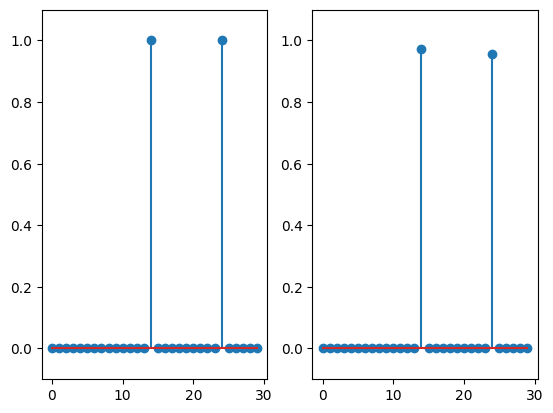

In [ ]:
# Reconstructed vector
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.stem(x_orig)
ax1.set_ylim(-0.1,1.1)
ax2 = fig.add_subplot(1, 2, 2)
ax2.stem(x_est)
ax2.set_ylim(-0.1,1.1)
#plt.show()

plt.savefig('distributed_sparse_LS_results.pdf', dpi=300)

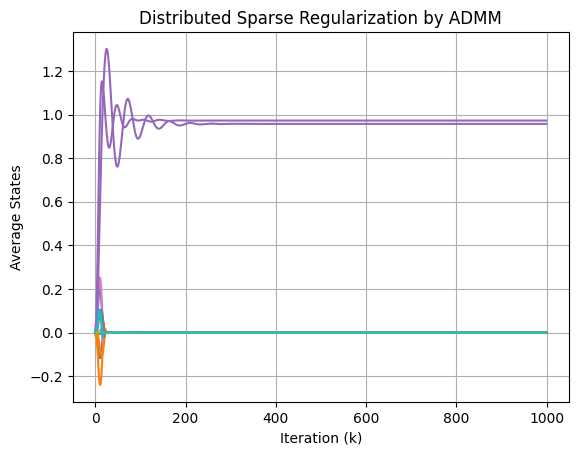

In [ ]:
# State trajectory
fig = plt.figure()
plt.plot(x_history)
plt.xlabel('Iteration (k)')
plt.ylabel('Average States')
plt.title('Distributed Sparse Regularization by ADMM')
plt.grid(True)
#plt.show()

plt.savefig('distributed_sparse_LS_convergence.pdf', dpi=300)


# 7. Applications of Compressed Sensing

## 7.2 Sparse System Identification

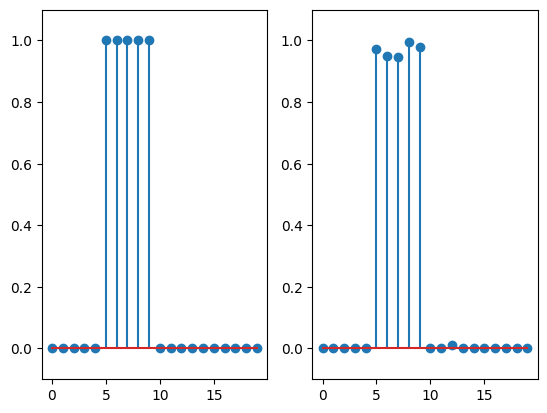

In [ ]:
import numpy as np
from scipy.linalg import toeplitz
from numpy.linalg import inv
import matplotlib.pyplot as plt

# input u
np.random.seed(0)
N = 100
u = np.random.rand(N)
u = np.where(u >= 0.5, 1, -1)

# true impulse response g*
m = 20
gstar = np.zeros([m,1])
gstar[5:10] = 1

# output y
sigma2 = 0.1 # noise sd
y = np.convolve(gstar.ravel(), u.ravel(), mode='full')[:N] + np.sqrt(sigma2)*np.random.randn(N)

# Toeplitz matrix U
U = toeplitz(np.concatenate(([u[0]], np.zeros(m - 1))), u).T

## Optimization by FISTA
# Soft-thresholding function
def St(lmbd, v):
    n = v.shape[0]
    Sv = np.zeros(n)
    i = np.abs(v) > lmbd
    Sv[i] = v[i] - np.sign(v[i]) * lmbd
    return Sv

# parameter settings
lmbd = 5
U_norm = np.linalg.norm(U,2)
gamma = 1/U_norm**2 # step size
max_itr = 100 # number of iterations
g = np.zeros(m) # initial guess for g
z = g # initial guess for z
t = 0 # initial guess for t

# FISTA iteration
for k in range(max_itr):
  res = U @ z - y
  g2 = St(gamma*lmbd, z - gamma*U.T @ res)
  t2 = (1 + np.sqrt(1+4*t**2))/2
  z = g2 + (t-1)/t2 * (g2 - g)
  g = g2
  t = t2

# Plot the results
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.stem(gstar)
ax1.set_ylim([-0.1,1.1])
ax2 = fig.add_subplot(1, 2, 2)
ax2.stem(g)
ax2.set_ylim([-0.1,1.1])
#plt.show()
plt.savefig("SYSID_result.pdf", dpi=300)


## 7.3 Sparse Controller Design

Install CVXPY

In [ ]:
!pip install cvxpy

In [ ]:
# Import packages.
import cvxpy as cp
import numpy as np

# System matrices
n = 5
m = 3
A = np.matrix(
  [[0,0,1.1320,0,-1],
   [0,-0.0538,-0.1712,0,0.0705],
   [0,0,0,1,0],
   [0,0.0485,0,-0.8556,-1.0130],
   [0,-0.2909,0,1.0532,-0.6859]]
   )
B = np.matrix(
    [[0,0,0],
     [-0.12,1,0],
     [0,0,0],
     [4.419,0,-1.6650],
     [1.575,0,-0.0732]])

# LMIs
epsil = 0.01
eI = epsil * np.eye(n)
P = cp.Variable((n,n), symmetric=True)
Y = cp.Variable((m,n))
objective = cp.Minimize(cp.norm1(Y))
constraints = [P - eI >> 0]
constraints += [A @ P + P @ A.T + B @ Y + Y.T @ B.T + eI << 0]

# Optimization
prob = cp.Problem(objective, constraints)
prob.solve()
Y_ = Y.value
Y_[np.abs(Y_) < 1e-6] = 0

# Print result.
print("The optimal value is", prob.value)
print("A solution Y is")
print(Y_)


The optimal value is 0.005529170689678172
A solution Y is
[[ 0.          0.          0.          0.          0.        ]
 [ 0.         -0.00552915  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]


# 10. Numerical Optimizaiton by Time Discretization

### Numerical Computation of Maximum Hands-off Control by CVXPY

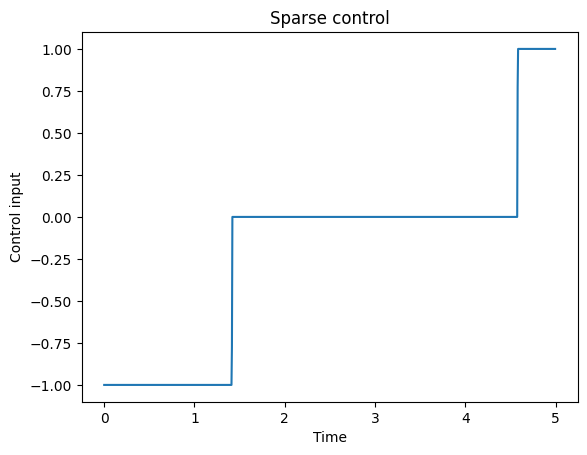

In [ ]:
import numpy as np
from numpy import linalg as LA
import cvxpy as cp
import matplotlib.pyplot as plt
from scipy.signal import cont2discrete as c2d

# System model
A = np.array([[0, 1], [0, 0]])
b = np.array([[0], [1]])
d = len(b)  # system size
x0 = np.array([[1], [1]])  # initial states
T = 5  # Horizon length

# Time discretization
n = 1000  # grid size
h = T / n  # discretization interval
Ad,bd,_,_,_ = c2d((A,b,None,None), h) #c2d

# Matrix Phi
Phi = np.zeros((d, n))
v = bd
Phi[:, -1] = v.flatten()
for j in range(1, n):
    v = Ad @ v
    Phi[:, -j - 1] = v.flatten()

# Vector zeta
Ad_n = LA.matrix_power(Ad, n)
zeta = -Ad_n @ x0.flatten()

# Convex optimization via CVXPY
u = cp.Variable(n)
objective = cp.Minimize(cp.norm(u, 1))
constraints = [Phi @ u == zeta] + [cp.norm(u, np.inf) <= 1]
problem = cp.Problem(objective, constraints)
problem.solve()

# Plot
plt.figure()
plt.plot(np.arange(0, T, h), u.value)
plt.title('Sparse control')
plt.xlabel('Time')
plt.ylabel('Control input')
plt.show()

### Numerical Computation of Maximum Hands-off Control by ADMM

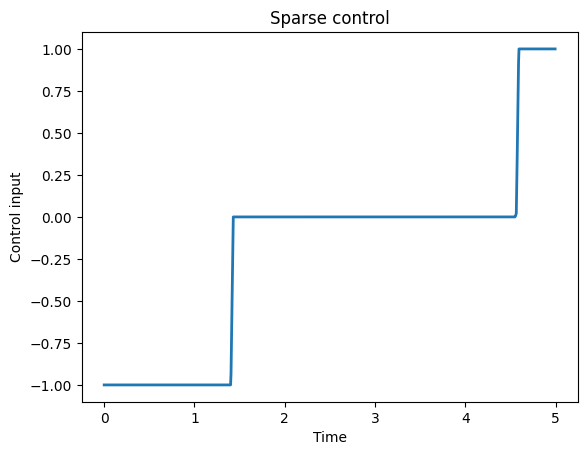

In [ ]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy.signal import cont2discrete as c2d

# System model
A = np.array([[0, 1], [0, 0]])
b = np.array([[0], [1]])
d = len(b)  # system size
x0 = np.array([[1], [1]])  # initial states
T = 5  # Horizon length

# Time discretization
n = 1000  # grid size
h = T / n  # discretization interval
Ad,bd,_,_,_ = c2d((A,b,None,None), h) #c2d

# Matrix Phi
Phi = np.zeros((d, n))
v = bd
Phi[:, -1] = v.flatten()
for j in range(1, n):
    v = Ad @ v
    Phi[:, -j - 1] = v.flatten()

# Vector zeta
Ad_n = LA.matrix_power(Ad, n)
zeta1 = -Ad_n @ x0.flatten()
zeta = zeta1.reshape(-1,1)

# ADMM parameters
mu = 2 * n + d
Psi = np.vstack((np.eye(n), np.eye(n), Phi))
PsiT = Psi.T
In = np.eye(n)
Id = np.eye(d)
M2 = 0.5 * In - 0.5 *Phi.T @ LA.inv(2 * Id + Phi @ Phi.T) @ Phi
EPS = 1e-4
MAX_ITER = 10000
z = np.concatenate((np.zeros((2 * n, 1)), zeta))
v = np.zeros((mu, 1))
r = zeta
k = 0
gamma = 0.05

# Soft-thresholding function
def soft_thresholding(gamma, x):
    return np.sign(x) * np.maximum(np.abs(x)-gamma,0)

# Saturation function
sat = lambda x: np.sign(x) * np.minimum(np.abs(x), 1)

# ADMM iterations
while (LA.norm(r) > EPS) and (k < MAX_ITER):
    u2 = PsiT @ (z-v)
    u = M2 @ u2
    z0 = soft_thresholding(gamma, u[:n] + v[:n])
    z1 = sat(u + v[n:n + n])
    z2 = zeta
    z = np.concatenate((z0, z1, z2))
    v = v + Psi @ u - z
    r = Phi @ u - zeta
    k = k + 1

# Plot
plt.figure()
plt.plot(np.arange(0, T, h), u, linewidth=2)
plt.title('Sparse control')
plt.xlabel('Time')
plt.ylabel('Control input')
plt.show()